# 주제분석 1주차 패키지 과제 - 3팀 선형대수학팀 김지민

## 0.3 본격적인 시작 전에

In [1]:
import numpy as np
import pandas as pd

## Chapter 1. 데이터 전처리

### 1.1 데이터 불러오기

In [2]:
data = pd.read_csv('data.csv')

### 1.2 데이터 확인

In [3]:
data.shape

(1216553, 13)

행 1,216,553개, 열 13개의 데이터이다.

In [4]:
# 데이터 생김새 확인
data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [6]:
# 결측치 확인
data.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

결측값은 없다.

### 1.3 불필요한 행 삭제 (reset index)

In [7]:
data = data[data['city'] == '서울특별시']
data.reset_index(drop = True, inplace = True)

In [8]:
data['city'].unique()

array(['서울특별시'], dtype=object)

### 1.4 변수 이름 바꾸기

In [9]:
data.rename(columns = {'transaction_real_price':'price'}, inplace = True)

### 1.5 불필요한 변수 삭제

In [10]:
data.drop(['transaction_id', 'apartment_id', 'jibun', 'city'], axis = 1, inplace = True)

In [11]:
data.shape

(742285, 9)

### 1.6 연/월 뽑기

In [12]:
year = []
month = []

for i in range(0,len(data)):
    year.append(str(data['transaction_year_month'].iloc[i])[:4])
    month.append(str(data['transaction_year_month'].iloc[i])[4:])
    
data['transaction_year'] = year
data['transaction_month'] = month

### 1.7 필요 연도 뽑기

In [13]:
data = data.astype({'transaction_year':'int'})

In [14]:
data = data[data['transaction_year'] >= 2012]
data = data.astype({'transaction_year':'object'})
data.reset_index(drop = True, inplace = True)

In [15]:
data.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,01
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,01
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,01
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,01
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,01


## Chapter 2. 데이터 시각화

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 거래가격 분포 확인

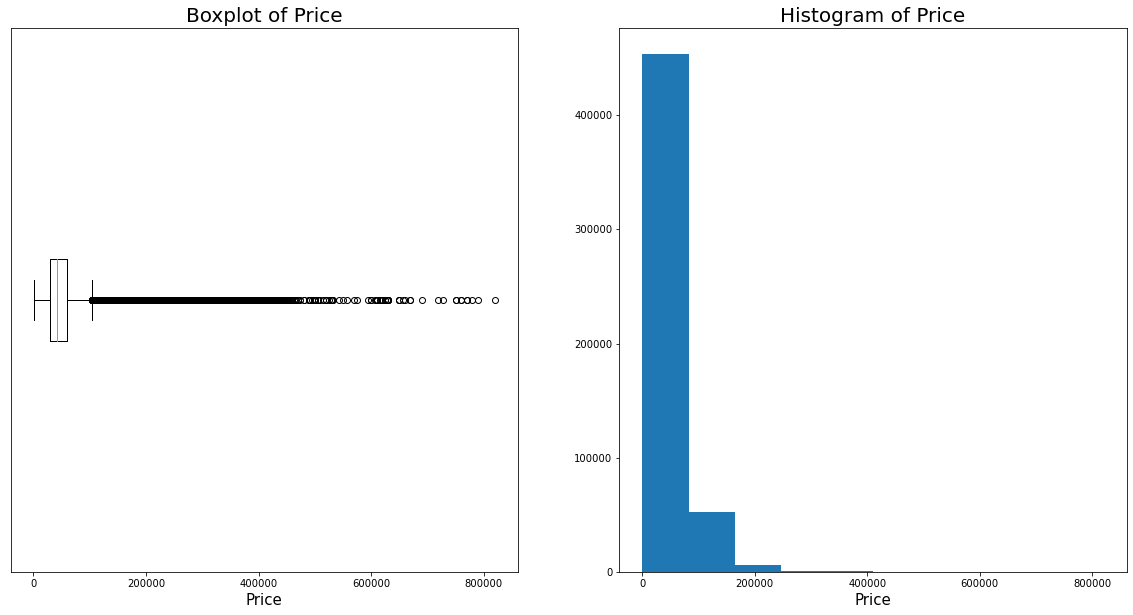

In [17]:
firstplot = plt.figure(figsize=(20,10))
axes1 = firstplot.add_subplot(1, 2, 1)
axes2 = firstplot.add_subplot(1, 2, 2)

axes1.boxplot(data['price'], vert = 0)
axes1.set_title('Boxplot of Price', fontsize = 20)
axes1.set_xlabel('Price', fontsize = 15)
axes1.set_yticks([])
axes1.set_frame_on(True)

axes2.hist(data['price'])
axes2.set_title('Histogram of Price', fontsize = 20)
axes2.set_xlabel('Price', fontsize = 15)
axes2.set_frame_on(True)

C:\Users\fleur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fleur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price')

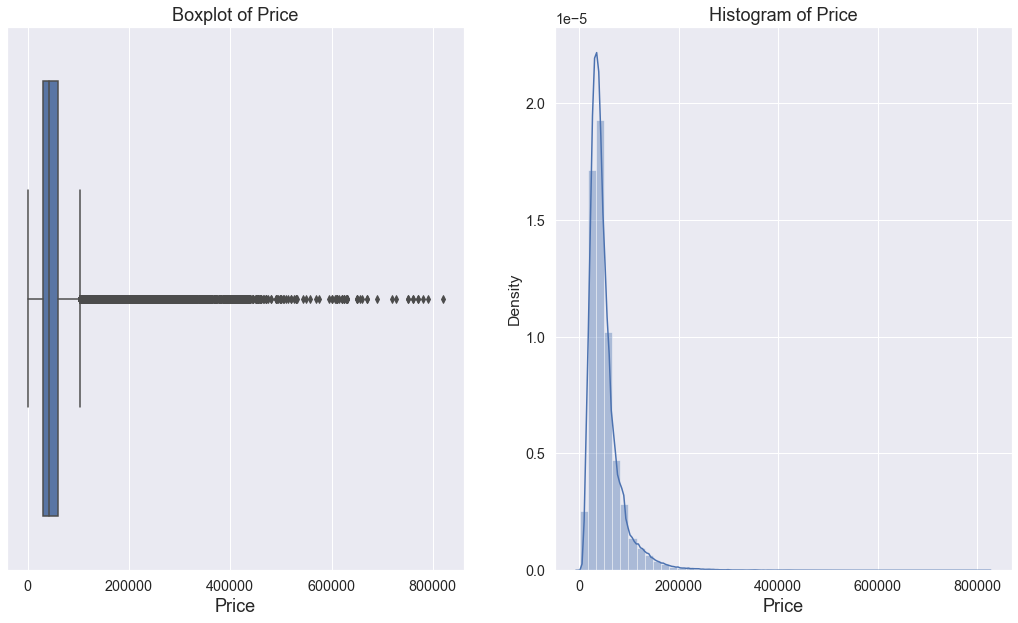

In [18]:
sns.set(font_scale = 1.3) 
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

sns.boxplot(data['price'], ax = axs[0])
axs[0].set_title('Boxplot of Price', fontsize = 18)
axs[0].set_xlabel('Price', fontsize = 18)

sns.distplot(data['price'], ax = axs[1])
axs[1].set_title('Histogram of Price', fontsize = 18)
axs[1].set_xlabel('Price', fontsize = 18)

거래 가격의 경우 interquantile range가 매우 좁아 이상치처럼 여겨지는 값들이 많았다. 0에서 200000 사이의 값, 특히 100000 이하의 값으로 거래되는 경우가 두드러지게 많은 것으로 보인다.

### 2.2 거래연도 분포 확인 / 거래연도별 가격 분포 확인

In [19]:
# 시각화 위한 데이터셋 1
count_byyear = pd.DataFrame(data['price'].groupby(data['transaction_year']).count())
count_byyear['transaction_year'] = count_byyear.index.values
count_byyear

,price,transaction_year
transaction_year,,
2012,40693,2012
2013,67594,2013
2014,84825,2014
2015,119354,2015
2016,109698,2016
2017,91364,2017


In [20]:
# 시각화 위한 데이터셋 2
price_byyear = pd.DataFrame(data['price'].groupby(data['transaction_year']).mean())
price_byyear['transaction_year'] = price_byyear.index.values
price_byyear

,price,transaction_year
transaction_year,,
2012,44415.902268,2012
2013,44319.457718,2013
2014,45848.998208,2014
2015,47747.375873,2015
2016,53693.710223,2016
2017,61566.261558,2017


In [21]:
# error bar
std_error = np.std(price_byyear['price'], ddof=1) / np.sqrt(len(price_byyear))

In [22]:
# color
color = ['#5975A4', '#CC8963', '#5F9E6E', '#B55D60', '#857AAB', '#8D7866']

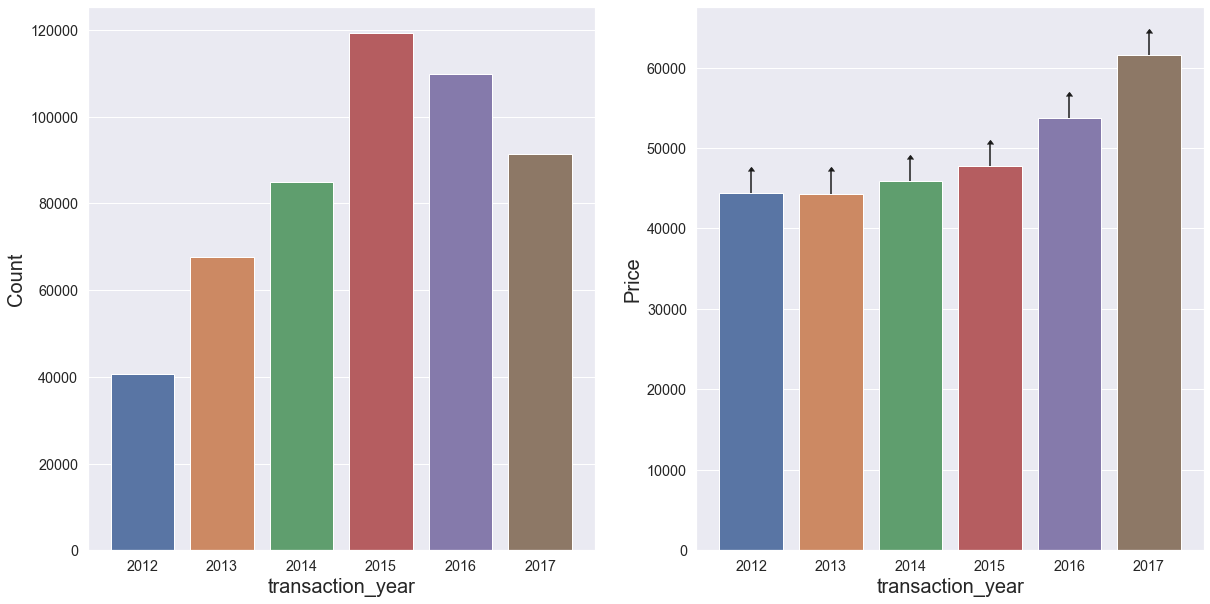

In [23]:
secondplot = plt.figure(figsize=(20,10))
axes1 = secondplot.add_subplot(1, 2, 1)
axes2 = secondplot.add_subplot(1, 2, 2)

axes1.bar(count_byyear['transaction_year'], count_byyear['price'], color = color)
axes1.set_xlabel('transaction_year', fontsize = 20)
axes1.set_ylabel('Count', fontsize = 20)
axes1.grid(axis = 'x')

axes2.bar(price_byyear['transaction_year'], price_byyear['price'], color = color)
axes2.errorbar(price_byyear['transaction_year'], price_byyear['price'], yerr = std_error, ls = 'None', color = 'k', lolims = True)
axes2.set_xlabel('transaction_year', fontsize = 20)
axes2.set_ylabel('Price', fontsize = 20)
axes2.grid(axis = 'x')

첫째, 거래 연도별 거래 횟수의 경우 2012년에 유독 적게 거래되었다가 2015년까지 꾸준히 오르고, 2015년에서 정점에 다다른 후 2017년까지는 감소하였다. 둘째, 거래 연도별 거래 가격의 경우는 2013년에서 아주 조금 주춤했지만 대략적으로는 시간이 지날수록, 즉 2012년에서 2017년까지 계속해서 증가하는 추세를 보인 것으로 나타났다.

### 2.3 층 분포 확인 / 층별 가격 분포 확인

In [24]:
# 시각화 위한 데이터셋 1
count_byfloor = pd.DataFrame(data['price'].groupby(data['floor']).count())

In [25]:
# 시각화 위한 데이터셋 2
price_byfloor = pd.DataFrame(data['price'].groupby(data['floor']).mean())

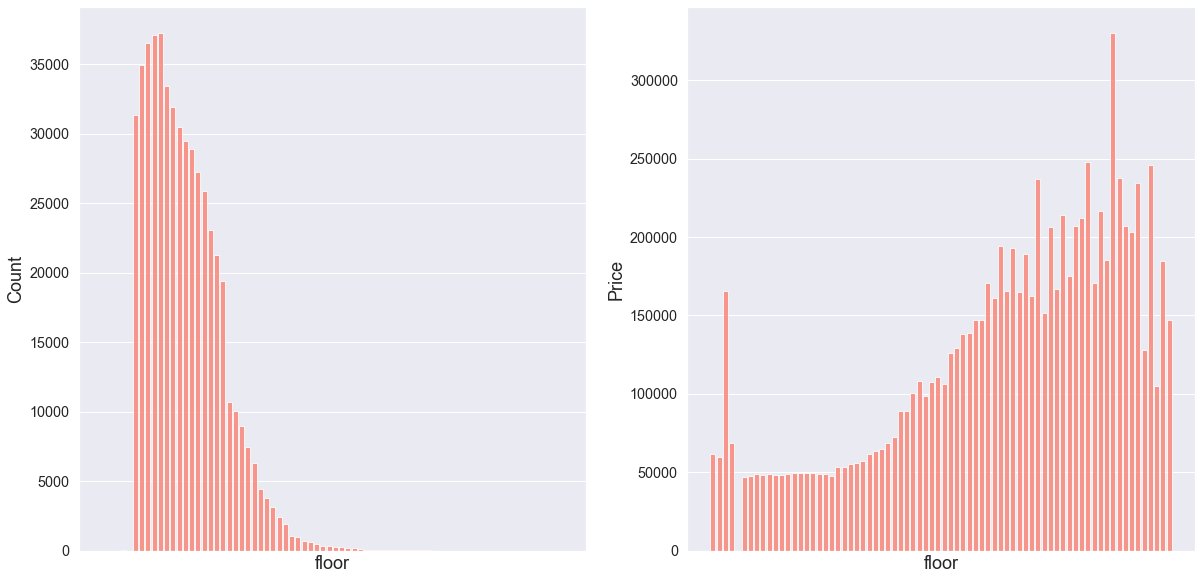

In [26]:
floorplot = plt.figure(figsize=(20,10))
axes1 = floorplot.add_subplot(1, 2, 1)
axes2 = floorplot.add_subplot(1, 2, 2)

axes1.bar(count_byfloor.index.values, count_byfloor['price'], color = ['salmon'], alpha = 0.8)
axes1.set_xticks([])
axes1.set_xlabel('floor', fontsize = 18)
axes1.set_ylabel('Count', fontsize = 18)
axes1.grid(axis = 'x')

axes2.bar(price_byfloor.index.values, price_byfloor['price'], color = ['salmon'], alpha = 0.8)
axes2.set_xticks([])
axes2.set_xlabel('floor', fontsize = 18)
axes2.set_ylabel('Price', fontsize = 18)
axes2.grid(axis = 'x')

첫째로 층별 거래 횟수의 분포를 살펴보면 저층과 고층의 차이가 꽤 뚜렷한 것으로 보인다. 저층의 경우가 훨씬 많은 횟수로 거래되었으며 대략 15층 정도 이상으로는 거래 횟수가 더욱 급격히 감소하였다. 애초에 15층 이상의 높이로 지어진 아파트의 개수가 적은 것도 영향이 있을 듯 보인다. 둘째로 층별 가격 분포 플랏에 따르면, '고층일수록 높은 가격에 거래될 것이다'라는 가설에 얼추 부합하는 결과가 나타났다. 3층에서 급격하게 높은 가격으로 거래된 것을 제외하면 저층의 경우 상대적으로 낮은 가격에 거래되었고, 고층으로 갈수록 높은 가격으로 거래되다가 어느 지점의 층에 다다르면 거래 가격이 조금 낮아졌다.

### 2.4 완공연도 분포 확인 / 완공연도별 가격 분포 확인

In [27]:
# 시각화 위한 데이터셋 1
count_bycompletion = pd.DataFrame(data['price'].groupby(data['year_of_completion']).count())

In [28]:
# 시각화 위한 데이터셋 2
price_bycompletion = pd.DataFrame(data['price'].groupby(data['year_of_completion']).mean())

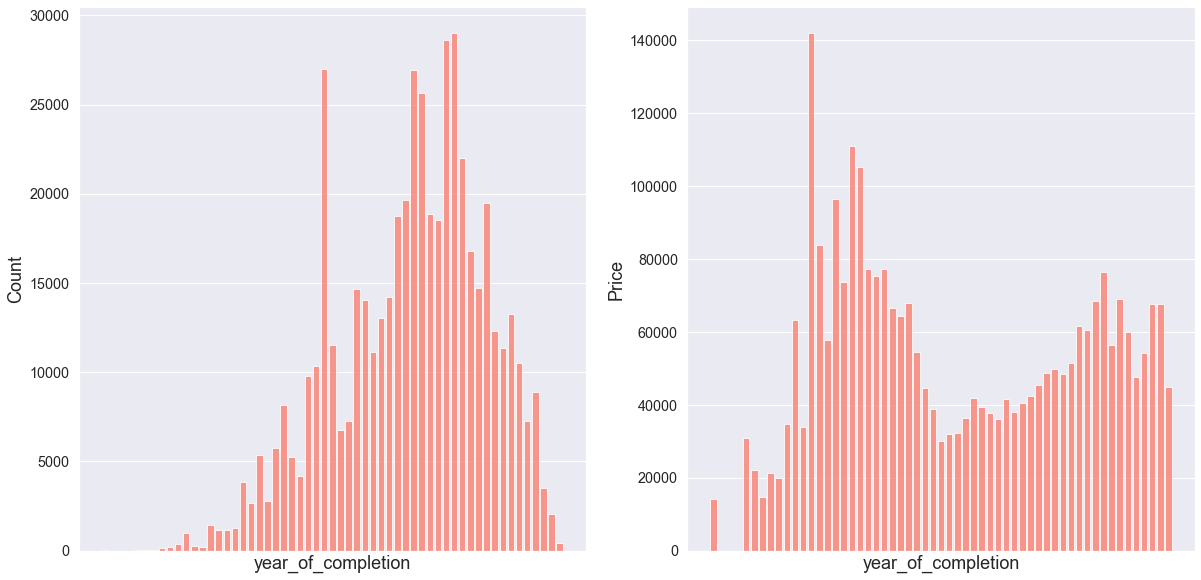

In [29]:
completionplot = plt.figure(figsize=(20,10))
axes1 = completionplot.add_subplot(1, 2, 1)
axes2 = completionplot.add_subplot(1, 2, 2)

axes1.bar(count_bycompletion.index.values, count_bycompletion['price'], color = ['salmon'], alpha = 0.8)
axes1.set_xlabel('year_of_completion', fontsize = 18)
axes1.set_ylabel('Count', fontsize = 18)
axes1.set_xticks([])
axes1.grid(axis = 'x')

axes2.bar(price_bycompletion.index.values, price_bycompletion['price'], color = ['salmon'], alpha = 0.8)
axes2.set_xlabel('year_of_completion', fontsize = 18)
axes2.set_ylabel('Price', fontsize = 18)
axes2.set_xticks([])
axes2.grid(axis = 'x')

첫째, 완공연도별 거래 횟수의 분포를 보면 아무래도 조금 연식이 있는 아파트의 경우 더 적은 횟수로 거래되었고 그와 동시에 또 매우 최근에 지어진 아파트의 경우도 그리 많지 않은 횟수로 거래가 이루어진 듯 보인다. 신식이면서도 적당히 연식 있는 아파트에 대한 선호가 높은 것으로 예측해볼 수도 있고, 최근에 지어진 아파트가 상대적으로 적어 위와 같은 결과가 나타난 것으로 해석해볼 수도 있겠다. 둘째, 완공연도별 가격 분포는 '최근의 아파트들이 더 비쌀 것이다'와 같은 가설과는 달리 오히려 조금 연식이 있는 편인 아파트들이 높은 가격에 거래된 것으로 보인다. 또, 꽤 최근에 지어진 아파트들이 지어진 지 적당히 오래된 아파트들보다 높은 가격에 거래된 것도 인상적이었다. 거래 횟수와 가격을 연결 지어 살펴보자면 거래 가격이 낮기 때문에 거래가 많이 된 것으로 예상해볼 수 있을 것이다.

## Chapter 3. 파생변수 생성

### 3.1 아파트 연차 변수 생성

In [30]:
# 아파트 연차 변수 'until_trans'
data['until_trans'] = 2021 - data['year_of_completion'] + 1

In [31]:
# 시각화 위한 데이터셋 1
count_byuntil = pd.DataFrame(data['price'].groupby(data['until_trans']).count())

In [32]:
# 시각화 위한 데이터셋 2
price_byuntil = pd.DataFrame(data['price'].groupby(data['until_trans']).mean())

In [33]:
# error bar
std_error = np.std(price_byuntil.price, ddof=1) / np.sqrt(len(price_byuntil))

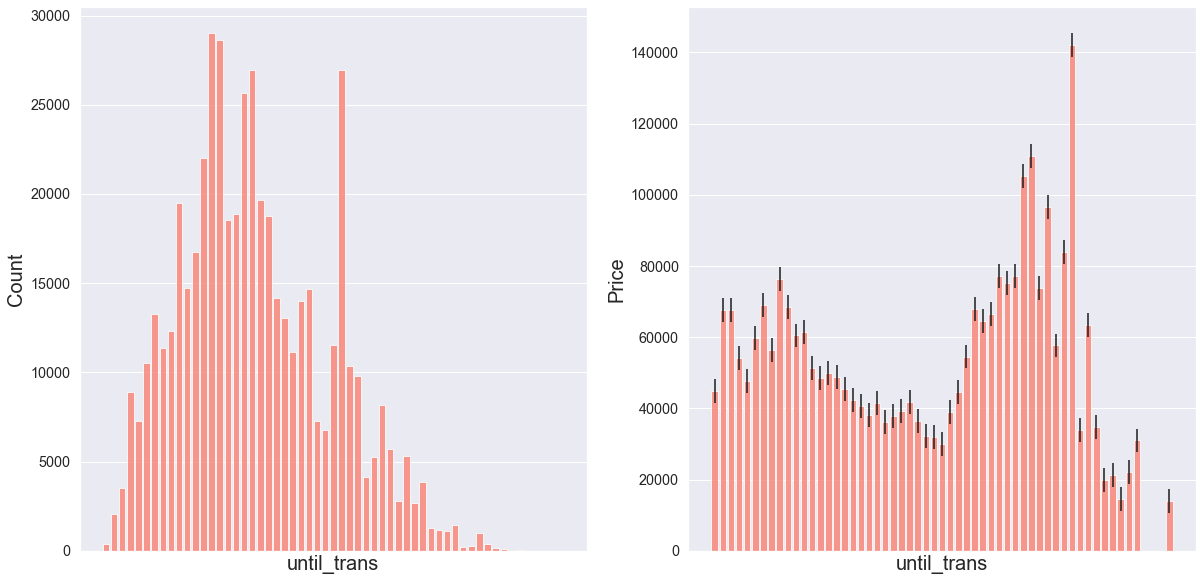

In [34]:
untilplot = plt.figure(figsize=(20,10))
axes1 = untilplot.add_subplot(1, 2, 1)
axes2 = untilplot.add_subplot(1, 2, 2)

axes1.bar(count_byuntil.index.values, count_byuntil['price'], color = ['salmon'], alpha = 0.8)
axes1.set_xlabel('until_trans', fontsize = 20)
axes1.set_ylabel('Count', fontsize = 20)
axes1.set_xticks([])
axes1.grid(axis = 'x')

axes2.bar(price_byuntil.index.values, price_byuntil['price'], color = ['salmon'], alpha = 0.8, yerr = std_error)
axes2.set_xlabel('until_trans', fontsize = 20)
axes2.set_ylabel('Price', fontsize = 20)
axes2.set_xticks([])
axes2.grid(axis = 'x')

먼저 아파트 연차의 분포는 대칭은 아니지만 얼추 정점이 있는 bell shape을 하고 있어 비슷한 시기에 지어진 아파트가 꽤 많은 것으로 보였고, 정점을 지난 어느 시점에서 갑자기 해당하는 아파트의 개수가 늘어나는 것도 특이점으로 고려할 수 있었다. 또한 연차에 따른 거래 가격의 경우, 연차가 매우 오래 된 아파트에 대해 거래 가격이 낮게 산정된 것은 사실이나 중간 정도 연차의 아파트가 꽤 낮은 가격에 거래되고, 어느 시점을 지나면 가격이 치솟는 등의 추세가 나타나 아파트 연차와 가격 간에 분명한 관계가 있다고 단정 지을 수 없었다. 단순히 아파트의 연차를 넣는 것 이외에 연차와 상관 없이 아파트가 충분히 잘 관리되고 있는지를 나타낼 수 있는 '엘리베이터 교체 시기' 등의 변수를 생성하는 것이 보다 바람직할 것으로 보인다.

### 3.2 거래 일 변수 변환

In [35]:
data['transaction_date'] = np.where(data['transaction_date']=='1~10', 0, np.where(data['transaction_date']=='11~20', 1, 2))

### 3.3 월 변수와 10일 단위 변수 통합

In [36]:
data = data.astype({'transaction_month':'int'})
data['transaction_month_date'] = data['transaction_month'] * 3 + data['transaction_date']
data = data.astype({'transaction_month':'object'})

In [37]:
data[['transaction_month_date', 'transaction_month', 'transaction_date']]

,transaction_month_date,transaction_month,transaction_date
0,3,1,0
1,4,1,1
2,4,1,1
3,3,1,0
4,5,1,2
...,...,...,...
513523,34,11,1
513524,35,11,2
513525,35,11,2
513526,35,11,2


### 3.4 연도별 주기성을 위한 파생변수 생성 (삼각변환)

In [38]:
import math

In [39]:
data['sin_date'] = np.sin(2 * np.pi * data.transaction_month_date / 4)
data['cos_date'] = np.cos(2 * np.pi * data.transaction_month_date / 4)

In [40]:
data.drop(['year_of_completion', 'transaction_year_month', 'transaction_date', 'transaction_month', 'transaction_month_date'], 
          axis = 1, inplace = True)

### 3.5 삼각변환을 통한 장점

삼각변환이 아닌 one-hot 인코딩 혹은 label 인코딩을 통해 절대적 숫자를 부여하게 되면, 11월의 11-20일에 거래된 것과 그다음 해 1월의 1-10일에 거래된 것은 그렇게 긴 시간 차가 아님에도 불구하고 34와 3, 즉 31의 시간 간격을 두고 거래된 것으로 여겨진다. 이때 cosine과 sine을 활용한 삼각변환을 통해 인코딩을 거치게 되면 모든 거래 일자의 값들을 서로 큰 차이가 나지 않는 비슷한 크기의 값들로 변환할 수 있고, 두 개의 다른 날짜가 같은 값을 가지는 cosine 변환의 단점을 sine 함수를 통해 보완함으로써 모든 날짜가 저마다의 고유한 값을 가지게끔 할 수 있다.

## Chapter 4. 텍스트 데이터 다루기

### 4.1 아파트 이름 한글부분만 뽑기

In [41]:
import re

In [42]:
apt = pd.DataFrame(data['apt'])

for j in range(0, len(apt)):
    han = re.compile('[^ ㄱ-ㅣ가-힣]+')
    apt.loc[j] = han.sub("", str(apt.loc[j]))

In [43]:
apt.head()

,apt
0,광화문풍림스페이스본
1,광화문풍림스페이스본
2,광화문풍림스페이스본
3,로얄팰리스스위트
4,로얄팰리스스위트


### 4.2 아파트 이름 DTM

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer(min_df = 5).fit_transform(apt.apt)
cv

<513528x4023 sparse matrix of type '<class 'numpy.int64'>'
	with 531773 stored elements in Compressed Sparse Row format>

### 4.3 아파트 이름 tf-idf

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidfv = TfidfVectorizer(min_df = 5).fit_transform(apt.apt)
tfidfv

<513528x4023 sparse matrix of type '<class 'numpy.float64'>'
	with 531773 stored elements in Compressed Sparse Row format>

### 4.4 질문

앞서 4.2와 4.3에서의 두 방식으로 만들어진 행렬들은 모두 대부분의 값이 0인 sparse한 행렬로 용량의 낭비라는 문제점을 야기한다. 또한 이 행렬을 원래 데이터프레임에 붙여 분석을 진행하게 되면 데이터셋의 column 개수가 과도하게 증가해 차원의 저주로도 이어질 수 있다. 따라서 하나의 값마다 절대적 값을 부여해 column 개수를 늘리지 않는 등의 방식을 가진 다른 인코딩 방법(label encoding, mean encoding, ...)을 사용해야 한다.

### 4.5 질문

word2vec의 경우 중심 단어를 기준으로 하여 양방향으로 n-1개의 주변 단어를 살피는데, 이때 이 one-hot encoding된 중심 단어가 입력값, 예측되는 주변 단어가 출력값이 된다. 그러나 현 데이터셋의 경우, 행의 개수가 매우 많아 size를 100으로 두면 예측에의 bias가 생겨 잘 작동하지 않을 것으로 보인다.

## Chapter 5. 인코딩

In [48]:
data = data.drop(columns = ['addr_kr'])

### 5.1 원핫 인코딩

In [49]:
# 변수 'dong'에 대해서
dong_onehot = pd.get_dummies(data['dong'])
dong_onehot.shape

(513528, 329)

In [50]:
# 변수 'apt'에 대해서
apt_onehot = pd.get_dummies(data['apt'])
apt_onehot.shape

(513528, 6765)

변수 'dong'과 'apt' 모두 unique한 값이 매우 많아 지나치게 많은 column을 가진 데이터프레임이 생성되었다. 따라서 원핫 인코딩은 적절하지 못하다.

### 5.2 레이블(label) 인코딩 - transaction_year

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['transaction_year'] = le.fit_transform(data['transaction_year'])

In [52]:
data.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,70000,0,14,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),108.55,11,100500,0,14,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),94.51,1,65800,0,14,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,30500,0,17,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,30500,0,17,1.000000e+00,3.061617e-16


2.2의 시각화 결과에 따르면 거래 연도와 거래 횟수, 그리고 거래 연도와 거래 가격 간에 선형적 증가 또는 선형적 감소의 관계가 존재하지 않기 때문에 레이블 인코딩을 통해 관찰값을 일괄적인 숫자 값으로 변환함으로써 숫자의 크기를 특성으로 작용하게끔 하는 것은 부적절할 것으로 보인다.

### 5.3 레이블(label) 인코딩

In [53]:
data_label = data
data_label['dong'] = le.fit_transform(data['dong'])
data_label['apt'] = le.fit_transform(data['apt'])

In [54]:
data_label.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,805,95.88,6,70000,0,14,-1.000000e+00,-1.836970e-16
1,130,805,108.55,11,100500,0,14,-2.449294e-16,1.000000e+00
2,130,805,94.51,1,65800,0,14,-2.449294e-16,1.000000e+00
3,164,2042,42.87,8,30500,0,17,-1.000000e+00,-1.836970e-16
4,164,2042,39.67,15,30500,0,17,1.000000e+00,3.061617e-16


변수 'dong'과 'apt'에 대해 이전에 진행했던 임베딩 및 인코딩 방식과 달리 레이블 인코딩의 경우 불필요하게 column의 개수를 늘리지 않고서 값들을 처리할 수 있어 분명한 이점이 있을 것으로 생각되지만, 이 역시 분석 시에 순서 개념을 전제하여 학습될 수 있음을 경계해야 한다.

### 5.3 mean encoding

In [55]:
target = 'price'
apt_mean = data.groupby('apt')[target].mean()

In [56]:
data['apt'] = data['apt'].map(apt_mean)

In [57]:
data.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,91174.766355,95.88,6,70000,0,14,-1.000000e+00,-1.836970e-16
1,130,91174.766355,108.55,11,100500,0,14,-2.449294e-16,1.000000e+00
2,130,91174.766355,94.51,1,65800,0,14,-2.449294e-16,1.000000e+00
3,164,36609.649123,42.87,8,30500,0,17,-1.000000e+00,-1.836970e-16
4,164,36609.649123,39.67,15,30500,0,17,1.000000e+00,3.061617e-16


mean encoding을 진행한 결과 column의 개수가 늘어나지 않아 차원의 저주 문제도 없고, 범주형 특성을 인코딩 결과에 담았기에 보다 향상된 예측을 담보할 수 있다는 이점이 있을 것으로 생각된다. 그러나 그와 동시에 예측값에 대한 정보를 데이터셋에 직접적으로 반영했기 때문에 오버피팅의 문제가 발생할 수 있을 것으로도 보인다.